### Dependencies 

In [ ]:
!pip install tensorflow
!pip install scikit.learn
!pip install pandas
!pip install numpy
!pip install seaborn

In [1]:
%matplotlib inline 
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from keras.datasets import mnist
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from tensorflow.keras import layers,losses,models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.applications.imagenet_utils import preprocess_input as zero_mean
from keras.callbacks import EarlyStopping

In [2]:
device_name = tf.test.gpu_device_name()
print(device_name)

2021-12-04 23:47:28.268058: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Preprocessing 

In [2]:
(data_train,label_train),(data_test,label_test)=mnist.load_data()
data_train_reshaped= data_train.reshape(data_train.shape[0], -1)
data_test_reshaped= data_test.reshape(data_test.shape[0], -1)

In [3]:
data_train_reshaped=data_train_reshaped/255
data_test_reshaped=data_test_reshaped/255
data_train_reshaped=scale(data_train_reshaped)
data_test_reshaped=scale(data_test_reshaped)

In [4]:
data_complete=np.concatenate((data_train_reshaped,data_test_reshaped))
data_complete=data_complete/255.0
data_complete=scale(data_complete)
label_complete=np.concatenate((label_train,label_test))
data_complete=data_complete.tolist()
label_complete=label_complete.tolist()


#### Visualising Data 



In [ ]:
dictdata={'Image': [],'Label':[]}
for i in range(6):
  dictdata['Image'].append(data_train[i][:])
  dictdata['Label'].append(label_train[i])

In [ ]:
displaydf=pd.DataFrame(dictdata)

In [ ]:
f, axarr = plt.subplots(2,3)
for i in range(6):
  axarr[int(i/3),i%3].imshow(displaydf['Image'][i],cmap='gray')

In [ ]:
dictdatatest={'Image': [],'Label':[]}
for i in range(6):
  dictdatatest['Image'].append(data_test[i][:])
  dictdatatest['Label'].append(label_test[i])

displaydftest=pd.DataFrame(dictdatatest)

In [ ]:
#Test Samples

for i in range(6):
  plt.figure()
  plt.title('True Label is %i'%displaydftest['Label'][i])
  plt.imshow(displaydftest['Image'][i],cmap='gray')

In [ ]:
f, axarr = plt.subplots(2,3)
for i in range(6):
  axarr[int(i/3),i%3].imshow(displaydftest['Image'][i],cmap='gray')

In [ ]:
# Complete Dataset Histogram
sns.countplot(label_complete);

### Dimensionality Reduction Need to Visualise

PCA

In [ ]:
# pca=PCA(n_components=459)
pca=PCA(n_components=20)
data_PCA_train_actual=pca.fit_transform(data_train_reshaped)
data_PCA_test_actual=pca.transform(data_test_reshaped)

MDA

In [ ]:
dim_redn_LDA=9
lda=LDA(n_components=dim_redn_LDA)
data_LDA_train_actual=lda.fit_transform(data_train_reshaped,label_train)
data_LDA_test_actual=lda.transform(data_test_reshaped)

### SVM 

Without Dimn Redn (Time Consuming)

In [ ]:
model_svm_linear=SVC(kernel='linear').fit(data_train_reshaped,label_train)
model_svm_linear.score(data_test_reshaped,label_test)

In [ ]:
model_svm_linear.score(data_train_reshaped,label_train )

####Linear Kernel

With PCA

In [ ]:
model_svm_linear=SVC(kernel='linear').fit(data_PCA_train_actual,label_train)
model_svm_linear.score(data_PCA_test_actual,label_test)

In [ ]:
#How well it is fit on the training data

model_svm_linear.score(data_PCA_train_actual,label_train)

In [ ]:
y_pred=model_svm_linear.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With LDA

In [ ]:
model_svm_linear=SVC(kernel='linear').fit(data_LDA_train_actual,label_train)
model_svm_linear.score(data_LDA_test_actual,label_test)

In [ ]:
y_pred=model_svm_linear.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

#### RBF Kernel

With PCA

In [ ]:
#Searching for optimal parameters

# param_grid = { "C" : [0.1]
#               , "gamma" : [0.1]}
# rf = SVC()
# gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=2, n_jobs=-1, verbose=1)
# gs = gs.fit(data_PCA_train, label_train)
# bp = gs.best_params_

In [ ]:
# model_svm_linear=SVC(C=bp['C'], kernel='rbf', gamma=bp['gamma']).fit(data_PCA_train,label_train)
model_svm_rbf=SVC( kernel='rbf' ).fit(data_PCA_train_actual,label_train)
model_svm_rbf.score(data_PCA_test_actual,label_test)

In [ ]:
y_pred=model_svm_rbf.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With LDA

In [ ]:
model_svm_rbf=SVC( kernel='rbf' ).fit(data_LDA_train_actual,label_train)
model_svm_rbf.score(data_LDA_test_actual,label_test)

In [ ]:
y_pred=model_svm_rbf.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

####Polynomial Kernel

With PCA

In [ ]:
model_svm_poly=SVC(kernel='poly').fit(data_PCA_train_actual,label_train)
model_svm_poly.score(data_PCA_test_actual,label_test)

In [ ]:
y_pred=model_svm_poly.predict(data_PCA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

With LDA

In [ ]:
model_svm_poly=SVC(kernel='poly').fit(data_LDA_train_actual,label_train)
model_svm_poly.score(data_LDA_test_actual,label_test)

In [ ]:
y_pred=model_svm_poly.predict(data_LDA_test_actual)
cm=metrics.confusion_matrix(y_true=label_test, y_pred=y_pred)
plt.figure(figsize = (16,8))
sns.heatmap(cm, annot=True);

### Logistic Regression Need to experiment a bit more

In [ ]:
data_train_LR=scale(data_train_reshaped)
data_test_LR=scale(data_test_reshaped)

With PCA

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=2000).fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

With MDA

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=2000).fit(data_LDA_train_actual, label_train)
clf.score(data_LDA_test_actual,label_test)

With Cross Validation on PCA

In [ ]:
clfnew=LogisticRegressionCV(max_iter=1000,cv=5).fit(data_PCA_train_actual,label_train)
clfnew.score(data_PCA_test_actual,label_test)

With Cross Validation on MDA

In [ ]:
clfnew=LogisticRegressionCV(max_iter=1000,cv=5).fit(data_LDA_train_actual,label_train)
clfnew.score(data_LDA_test_actual,label_test)

Balanced class weights

In [ ]:
clfbal=LogisticRegression(class_weight='balanced',max_iter=2000).fit(data_PCA_train_actual,label_train)
clfbal.score(data_PCA_test_actual,label_test)

L1 penalty

PCA

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=2000,penalty='l1',solver='liblinear').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

MDA

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=2000,penalty='l1',solver='liblinear').fit(data_LDA_train_actual, label_train)
clf.score(data_LDA_test_actual,label_test)

Changing Solvers

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=2000,solver='saga').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=2000,solver='newton-cg').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

In [ ]:
clf = LogisticRegression(random_state=0,max_iter=2000,solver='liblinear').fit(data_PCA_train_actual, label_train)
clf.score(data_PCA_test_actual,label_test)

### CNN Implementation 


In [5]:
paddings=tf.constant([[0,0],[2,2],[2,2]])
data_train_padded=tf.pad(data_train,paddings,"CONSTANT")
data_train_padded.shape
data_test_padded=tf.pad(data_test,paddings,"CONSTANT")
data_test_padded.shape

2021-12-05 16:25:55.321964: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorShape([10000, 32, 32])

In [ ]:
data_train_padded=data_train_padded/255
data_test_padded=data_test_padded/255

In [ ]:
data_train_padded_array=np.array(data_train_padded)/255.0
data_test_padded_array=np.array(data_test_padded)/255.0

In [ ]:
data_train_CNN= data_train_padded_array.reshape(data_train_padded_array.shape[0], -1)
data_test_CNN= data_test_padded_array.reshape(data_test_padded_array.shape[0], -1)
data_train_CNN.shape

In [ ]:
data_train_CNN_array=data_train_CNN/255.0
data_test_CNN_array=data_test_CNN/255.0

In [ ]:
[x,y,z]=data_train_padded.shape

In [6]:
#Adding Channel information (Grayscale)
data_train_CNN = tf.expand_dims(data_train_padded, axis=3, name=None)
data_test_CNN = tf.expand_dims(data_test_padded, axis=3, name=None)

In [9]:
#Defining LeNet5

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 14, 14, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 5, 5, 16)         

In [10]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 12s 13ms/step - loss: 0.9618 - accuracy: 0.6631 - val_loss: 0.2652 - val_accuracy: 0.9159
Epoch 2/40
938/938 [==============================] - 12s 13ms/step - loss: 0.2484 - accuracy: 0.9218 - val_loss: 0.1734 - val_accuracy: 0.9461
Epoch 3/40
938/938 [==============================] - 12s 13ms/step - loss: 0.1779 - accuracy: 0.9432 - val_loss: 0.1961 - val_accuracy: 0.9308
Epoch 4/40
938/938 [==============================] - 12s 12ms/step - loss: 0.1402 - accuracy: 0.9567 - val_loss: 0.1217 - val_accuracy: 0.9598
Epoch 5/40
938/938 [==============================] - 12s 13ms/step - loss: 0.1211 - accuracy: 0.9619 - val_loss: 0.1099 - val_accuracy: 0.9663
Epoch 6/40
938/938 [==============================] - 12s 13ms/step - loss: 0.1054 - accuracy: 0.9667 - val_loss: 0.1595 - val_accuracy: 0.9492
Epoch 7/40
938/938 [==============================] - 13s 13ms/step - loss: 0.0995 - accuracy: 0.9693 - val_loss: 0.0936 - val_accuracy:

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
model.evaluate(data_test_CNN, label_test)

Same Architecture changing activation functions

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(16, 5, activation='relu'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(120, 5, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

In [ ]:
model.evaluate(data_test_CNN, label_test)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

Changing Kernel Size

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

In [ ]:
model.evaluate(data_test_CNN, label_test)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

MSE is not good for classification. Non-convex

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.Conv2D(6, 3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.Conv2D(16, 3, activation='relu'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Conv2D(120, 3, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))
model.summary()


In [ ]:
model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

In [ ]:
model.evaluate(data_test_CNN, label_test)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

More tuning

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,3, activation='relu', input_shape=data_train_CNN.shape[1:]))
model.add(layers.MaxPooling2D(2,strides=(2,2)))
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2,strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,input_shape=(3136,), activation=None))
model.add(layers.Dense(10, input_shape=(128,), activation=None))
model.summary()


In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

In [ ]:
model.evaluate(data_test_CNN, label_test)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
data_train_unpadded=(data_train/255)
data_test_unpadded=(data_test/255)

In [ ]:
data_train_CNN_Le1 = tf.expand_dims(data_train_unpadded, axis=3, name=None)
data_test_CNN_Le1 = tf.expand_dims(data_test_unpadded, axis=3, name=None)

In [ ]:
#Lenet 1
model = models.Sequential()
model.add(layers.Conv2D(4, 5, activation='tanh', input_shape=data_train_CNN_Le1.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(12, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN_Le1, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN_Le1, label_test))

In [ ]:
model.evaluate(data_test_CNN_Le1, label_test)

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

Dropout in architecture

In [7]:
# Lenet 5

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=data_train_CNN.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [8]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(data_train_CNN, label_train, batch_size=64, epochs=40, validation_data=(data_test_CNN, label_test))

Epoch 1/40
938/938 [==============================] - 13s 13ms/step - loss: 1.3056 - accuracy: 0.5324 - val_loss: 0.4417 - val_accuracy: 0.8578
Epoch 2/40
938/938 [==============================] - 13s 13ms/step - loss: 0.4210 - accuracy: 0.8609 - val_loss: 0.3088 - val_accuracy: 0.9006
Epoch 3/40
938/938 [==============================] - 12s 13ms/step - loss: 0.3411 - accuracy: 0.8899 - val_loss: 0.2346 - val_accuracy: 0.9275
Epoch 4/40
938/938 [==============================] - 13s 14ms/step - loss: 0.2979 - accuracy: 0.9048 - val_loss: 0.1978 - val_accuracy: 0.9383
Epoch 5/40
938/938 [==============================] - 12s 13ms/step - loss: 0.2660 - accuracy: 0.9145 - val_loss: 0.1994 - val_accuracy: 0.9343
Epoch 6/40
938/938 [==============================] - 13s 13ms/step - loss: 0.2438 - accuracy: 0.9219 - val_loss: 0.1619 - val_accuracy: 0.9507
Epoch 7/40
938/938 [==============================] - 12s 13ms/step - loss: 0.2263 - accuracy: 0.9289 - val_loss: 0.1674 - val_accuracy:

### Transfer Learning

#### Data Loading and Preprocessing

In [2]:
# Importing Dataset

TRAIN_DIR = 'Transfer_Learning_Dataset/training/training'
VAL_DIR = 'Transfer_Learning_Dataset/validation/validation'


In [3]:
img_width = 224 
img_height = 224 
batch_size = 32 
train_dataset_size = 1098
val_dataset_size = 272
number_classes = 10 

In [4]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
label_df = pd.read_csv("Transfer_Learning_Dataset/monkey_labels.txt", names=cols, skiprows=1)
label_df

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [5]:
labels = label_df['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [8]:
generate_train_data = ImageDataGenerator(rescale=1./255)
train_generator = generate_train_data.flow_from_directory(TRAIN_DIR,target_size=(120,120),batch_size=32,class_mode='categorical') 


generate_test_data = ImageDataGenerator(rescale=1./255)
test_generator = generate_test_data.flow_from_directory(VAL_DIR,target_size=(120,120),batch_size=32,class_mode='categorical') 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


TASK 1

In [5]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)

In [6]:
model =models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=32,kernel_size=(4,4),input_shape=(120,120,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 117, 117, 32)      1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 58, 58, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 23328)             0         
                                                                 
 dense (Dense)               (None, 128)               2

2021-12-02 18:00:08.546537: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])
model.fit(train_generator,validation_data=test_generator,epochs=10)

Epoch 1/10
35/35 [==============================] - 35s 978ms/step - loss: 0.3962 - accuracy: 0.9144 - val_loss: 1.6656 - val_accuracy: 0.5735
Epoch 2/10
35/35 [==============================] - 32s 921ms/step - loss: 0.0457 - accuracy: 0.9863 - val_loss: 1.7840 - val_accuracy: 0.6140
Epoch 3/10
35/35 [==============================] - 34s 974ms/step - loss: 0.0107 - accuracy: 0.9991 - val_loss: 1.7888 - val_accuracy: 0.6213
Epoch 4/10
35/35 [==============================] - 36s 1s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 1.8786 - val_accuracy: 0.6287
Epoch 5/10
35/35 [==============================] - 34s 972ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 1.8712 - val_accuracy: 0.6324
Epoch 6/10
35/35 [==============================] - 36s 1s/step - loss: 0.0540 - accuracy: 0.9909 - val_loss: 1.7944 - val_accuracy: 0.5956
Epoch 7/10
35/35 [==============================] - 36s 1s/step - loss: 0.0301 - accuracy: 0.9936 - val_loss: 1.9570 - val_accuracy: 0.5919
Epoch 8/

In [8]:
model.evaluate(test_generator)

9/9 [==============================] - 6s 582ms/step - loss: 1.6275 - accuracy: 0.6250


[1.6275296211242676, 0.625]

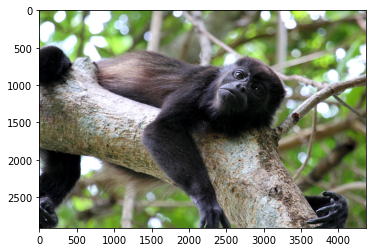

In [9]:
LABEL = 'n0'
IMAGE = 'n0021.jpg'
img = load_img(TRAIN_DIR+'/'+LABEL+'/'+IMAGE) # image loaded as PIL object
_ = plt.imshow(img)

TASK 2

In [3]:
# If on MACOSX please refer to https://github.com/ageron/handson-ml/issues/46#issuecomment-311323613 to workaround the bug

from keras.applications import xception
model=xception.Xception(weights='imagenet',include_top=False,input_shape=(299,299,3))
model.trainable=False

2021-12-05 12:14:50.646461: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
generate_train_data = ImageDataGenerator(rescale=1./255)
train_generator = generate_train_data.flow_from_directory(TRAIN_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 


generate_test_data = ImageDataGenerator(rescale=1./255)
test_generator = generate_test_data.flow_from_directory(VAL_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [5]:
from keras.models import Model
from keras.applications.xception import preprocess_input

In [6]:
generate_train_data = ImageDataGenerator(
    horizontal_flip = True,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    rescale = 1./255.,
    rotation_range = 20,
    )
data_gen_TL_train = generate_train_data.flow_from_directory(TRAIN_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 


generate_test_data = ImageDataGenerator(rescale=1./255)
data_gen_TL_test = generate_test_data.flow_from_directory(VAL_DIR,target_size=(299,299),batch_size=32,class_mode='categorical') 

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


Extract Train Data into array

In [147]:
data_gen_TL_train.reset()
data_train_TL=np.concatenate([data_gen_TL_train.next()[0] for i in range(data_gen_TL_train.__len__())])
label_train_TL=np.concatenate([data_gen_TL_train.next()[1] for i in range(data_gen_TL_train.__len__())])

In [148]:
label_train_TL_finale=[None]*len(label_train_TL)
for i in range(len(label_train_TL)):
    label_train_TL_finale[i]=list(label_train_TL[i][:]).index(1)

Extract Test Data into array

In [149]:
data_gen_TL_test.reset()
data_test_TL=np.concatenate([data_gen_TL_test.next()[0] for i in range(data_gen_TL_test.__len__())])
label_test_TL=np.concatenate([data_gen_TL_test.next()[1] for i in range(data_gen_TL_test.__len__())])

In [56]:
print(data_test_TL.shape)
print(label_test_TL.shape)

(272, 299, 299, 3)
(272, 10)


In [ ]:
label_test_TL_finale=[None]*len(label_test_TL)
for i in range(len(label_test_TL)):
    label_test_TL_finale[i]=list(label_test_TL[i][:]).index(1)
print(label_test_TL_finale.shape)

In [7]:
flat1 = layers.Flatten()(model.layers[-1].output)
class1 = layers.Dense(1024, activation='relu')(flat1)
output = layers.Dense(10, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [10]:
model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(data_gen_TL_train,epochs=10,validation_data=data_gen_TL_test)

Epoch 1/10
35/35 [==============================] - 128s 4s/step - loss: 5.1475 - accuracy: 0.8470 - val_loss: 0.6375 - val_accuracy: 0.9779
Epoch 2/10
35/35 [==============================] - 148s 4s/step - loss: 1.1048 - accuracy: 0.9590 - val_loss: 0.1961 - val_accuracy: 0.9853
Epoch 3/10
35/35 [==============================] - 139s 4s/step - loss: 1.0497 - accuracy: 0.9736 - val_loss: 0.5343 - val_accuracy: 0.9816
Epoch 4/10
35/35 [==============================] - 148s 4s/step - loss: 1.6674 - accuracy: 0.9608 - val_loss: 0.5280 - val_accuracy: 0.9743
Epoch 5/10
35/35 [==============================] - 152s 4s/step - loss: 1.4006 - accuracy: 0.9663 - val_loss: 0.4578 - val_accuracy: 0.9816
Epoch 6/10
35/35 [==============================] - 152s 4s/step - loss: 0.8858 - accuracy: 0.9754 - val_loss: 0.2841 - val_accuracy: 0.9853
Epoch 7/10
35/35 [==============================] - 153s 4s/step - loss: 0.5275 - accuracy: 0.9845 - val_loss: 0.3435 - val_accuracy: 0.9853
Epoch 8/10
35

TL Trying Again

In [5]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from keras.preprocessing import image

In [1]:
training_path = os.path.join("Transfer_Learning_Dataset/training/training")
validation_path = os.path.join("Transfer_Learning_Dataset/validation/validation")
path = os.listdir(training_path)

In [4]:
training_generator = ImageDataGenerator(
    horizontal_flip = True,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    rescale = 1./255.,
    rotation_range = 20,
    )

In [6]:
train_data = training_generator.flow_from_directory(
    training_path, batch_size = 32, target_size=(150, 150), class_mode = "categorical", shuffle = True)

val_gen = ImageDataGenerator(
    rescale = 1./255.
)
val_data = val_gen.flow_from_directory(validation_path, batch_size = 1, target_size = (150,150),class_mode = "categorical", shuffle = True)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [7]:
model = InceptionV3(weights='imagenet', include_top=False, input_shape = (150,150,3))
model.summary()

2021-12-05 12:02:07.745249: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [8]:
model.trainable = False
add_model = models.Sequential()
add_model.add(model)
add_model.add(layers.GlobalAveragePooling2D())
add_model.add(layers.Dropout(0.5))
add_model.add(layers.Dense(10, 
                    activation='softmax'))

In [9]:
add_model.compile(loss='categorical_crossentropy', 
              optimizer="adam",
              metrics=['accuracy'])
add_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 10)                20490     
                                                                 
Total params: 21,823,274
Trainable params: 20,490
Non-trainable params: 21,802,784
_________________________________________________________________


In [10]:
history = add_model.fit(train_data, 
                              epochs=10,validation_data=val_data)

Epoch 1/10
35/35 [==============================] - 41s 1s/step - loss: 2.9978 - accuracy: 0.4080 - val_loss: 0.5333 - val_accuracy: 0.8088
Epoch 2/10
35/35 [==============================] - 36s 1s/step - loss: 1.1973 - accuracy: 0.6922 - val_loss: 0.2809 - val_accuracy: 0.9007
Epoch 3/10
35/35 [==============================] - 35s 1s/step - loss: 0.8897 - accuracy: 0.7596 - val_loss: 0.3303 - val_accuracy: 0.8897
Epoch 4/10
35/35 [==============================] - 35s 994ms/step - loss: 0.7646 - accuracy: 0.7851 - val_loss: 0.2393 - val_accuracy: 0.9265
Epoch 5/10
35/35 [==============================] - 36s 1s/step - loss: 0.6653 - accuracy: 0.8260 - val_loss: 0.2208 - val_accuracy: 0.9228
Epoch 6/10
35/35 [==============================] - 36s 1s/step - loss: 0.6391 - accuracy: 0.8297 - val_loss: 0.2034 - val_accuracy: 0.9301
Epoch 7/10
35/35 [==============================] - 41s 1s/step - loss: 0.4568 - accuracy: 0.8707 - val_loss: 0.2209 - val_accuracy: 0.9265
Epoch 8/10
35/35 

In [11]:
add_model.evaluate(val_data)

272/272 [==============================] - 9s 34ms/step - loss: 0.2182 - accuracy: 0.9375


[0.21819378435611725, 0.9375]